Criando dados sintéticos

In [1]:
import random
import pandas as pd

# Definindo as médias e desvios padrão para cada disciplina
mecanica_media = 5.5
mecanica_desvio = 0.8

eletricidade_media = 5.9
eletricidade_desvio = 1.2

optica_media = 5.0
optica_desvio = 1.4

termodinamica_media = 6.5
termodinamica_desvio = 1.5

# Gerando os dados sintéticos
data = []
for _ in range(500):
    matricula = random.randint(100000, 999999)
    mecanica = round(random.gauss(mecanica_media, mecanica_desvio), 1)
    eletricidade = round(random.gauss(eletricidade_media, eletricidade_desvio), 1)
    optica = round(random.gauss(optica_media, optica_desvio), 1)
    termodinamica = round(random.gauss(termodinamica_media, termodinamica_desvio), 1)
    data.append([matricula, mecanica, eletricidade, optica, termodinamica])

# Criando o dataframe com os dados sintéticos
columns = ['Matricula', 'Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']
df = pd.DataFrame(data, columns=columns)

# Exibindo o dataframe
print(df)

     Matricula  Mecanica  Eletricidade  Optica  Termodinamica
0       885995       5.9           8.2     7.0            8.3
1       757365       3.8           5.0     4.5            8.9
2       440686       5.8           3.7     4.9            4.2
3       191885       5.4           5.3     3.1            6.7
4       264593       3.6           6.0     6.8            7.5
..         ...       ...           ...     ...            ...
495     642746       6.0           4.2     5.4            8.2
496     993898       4.7           6.0     5.2            6.4
497     782124       5.7           7.5     2.4            6.3
498     227046       6.8           5.2     2.4            6.5
499     405287       4.7           5.5     3.2            5.7

[500 rows x 5 columns]


Inserindo Tags de reprovação e aprovação

In [2]:
# Verificando a aprovação/reprovação em cada disciplina
df['Status Mecanica'] = df['Mecanica'].apply(lambda x: 'Aprovado' if x >= 5.0 else 'Reprovado')
df['Status Eletricidade'] = df['Eletricidade'].apply(lambda x: 'Aprovado' if x >= 5.0 else 'Reprovado')
df['Status Optica'] = df['Optica'].apply(lambda x: 'Aprovado' if x >= 5.0 else 'Reprovado')
df['Status Termodinamica'] = df['Termodinamica'].apply(lambda x: 'Aprovado' if x >= 5.0 else 'Reprovado')

# Calculando a média das quatro notas
df['Media'] = df[['Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']].mean(axis=1)

# Verificando a aprovação/reprovação com base na média
df['Status Geral'] = df['Media'].apply(lambda x: 'Aprovado' if x >= 5.0 else 'Reprovado')

# Exibindo o dataframe atualizado
print(df)


     Matricula  Mecanica  Eletricidade  Optica  Termodinamica Status Mecanica  \
0       885995       5.9           8.2     7.0            8.3        Aprovado   
1       757365       3.8           5.0     4.5            8.9       Reprovado   
2       440686       5.8           3.7     4.9            4.2        Aprovado   
3       191885       5.4           5.3     3.1            6.7        Aprovado   
4       264593       3.6           6.0     6.8            7.5       Reprovado   
..         ...       ...           ...     ...            ...             ...   
495     642746       6.0           4.2     5.4            8.2        Aprovado   
496     993898       4.7           6.0     5.2            6.4       Reprovado   
497     782124       5.7           7.5     2.4            6.3        Aprovado   
498     227046       6.8           5.2     2.4            6.5        Aprovado   
499     405287       4.7           5.5     3.2            5.7       Reprovado   

    Status Eletricidade Sta

Plotando gráficos para uma melhor visualização

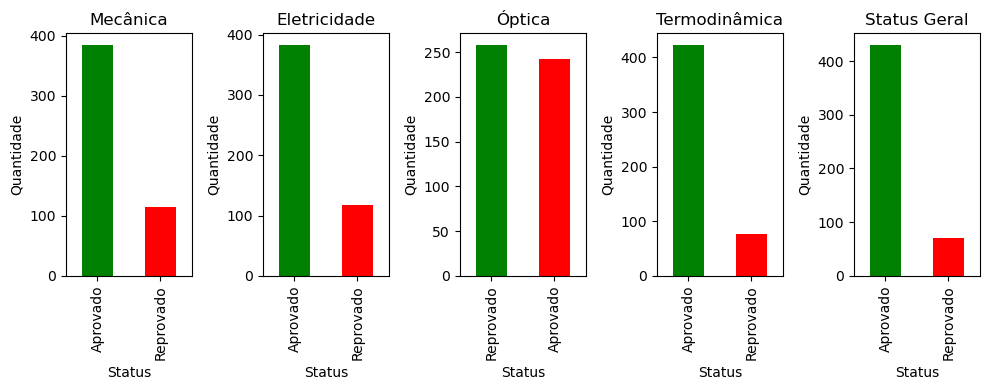

In [3]:
import matplotlib.pyplot as plt

# Contando a quantidade de aprovações e reprovações em cada disciplina
mecanica_counts = df['Status Mecanica'].value_counts()
eletricidade_counts = df['Status Eletricidade'].value_counts()
optica_counts = df['Status Optica'].value_counts()
termodinamica_counts = df['Status Termodinamica'].value_counts()

# Contando a quantidade de aprovações e reprovações no status geral
status_geral_counts = df['Status Geral'].value_counts()

# Plotando os gráficos
plt.figure(figsize=(10, 4))

# Gráfico de Mecânica
plt.subplot(151)
mecanica_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Mecânica')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Gráfico de Eletricidade
plt.subplot(152)
eletricidade_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Eletricidade')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Gráfico de Óptica
plt.subplot(153)
optica_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Óptica')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Gráfico de Termodinâmica
plt.subplot(154)
termodinamica_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Termodinâmica')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Gráfico de Status Geral
plt.subplot(155)
status_geral_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Status Geral')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Ajustando a posição dos gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()


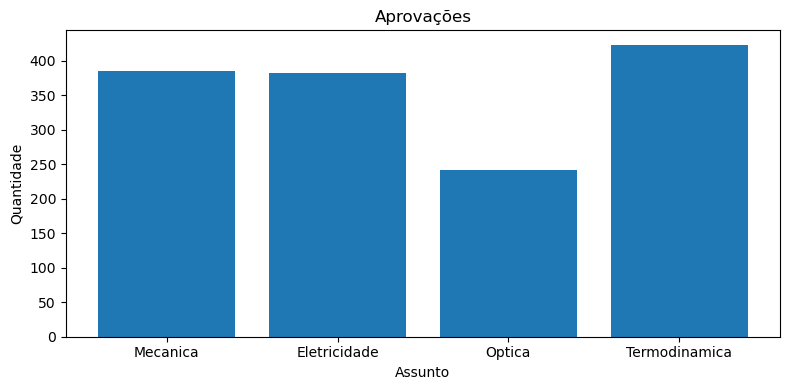

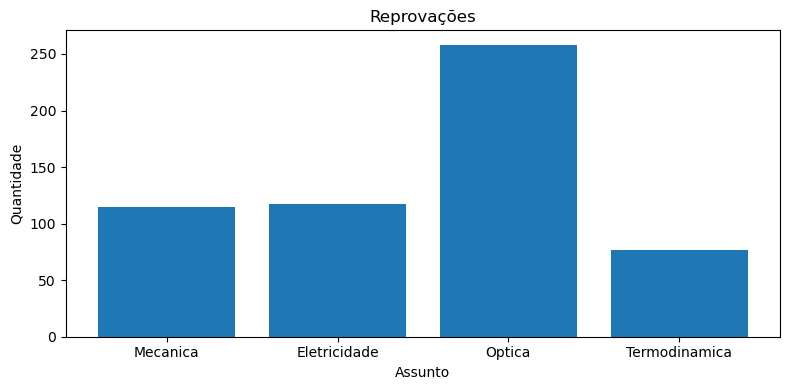

In [4]:

# Agrupando os dados por assunto
aprovados = [
    df[df['Status Mecanica'] == 'Aprovado'].shape[0],
    df[df['Status Eletricidade'] == 'Aprovado'].shape[0],
    df[df['Status Optica'] == 'Aprovado'].shape[0],
    df[df['Status Termodinamica'] == 'Aprovado'].shape[0]
]
reprovados = [
    df[df['Status Mecanica'] == 'Reprovado'].shape[0],
    df[df['Status Eletricidade'] == 'Reprovado'].shape[0],
    df[df['Status Optica'] == 'Reprovado'].shape[0],
    df[df['Status Termodinamica'] == 'Reprovado'].shape[0]
]

# Definindo os rótulos dos assuntos
assuntos = ['Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']

# Plotando o gráfico de aprovações
plt.figure(figsize=(8, 4))
plt.bar(assuntos, aprovados)
plt.title('Aprovações')
plt.xlabel('Assunto')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Plotando o gráfico de reprovações
plt.figure(figsize=(8, 4))
plt.bar(assuntos, reprovados)
plt.title('Reprovações')
plt.xlabel('Assunto')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()



Criando o modelo de ML

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
X = df[['Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']]
y = df['Status Geral']

# Treinando o modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X, y)

# Realizando previsões para notas abaixo de 5 em cada assunto
subjects = ['Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']
threshold = 5.0

for subject in subjects:
    below_threshold = df[df[subject] < threshold]
    if len(below_threshold) > 0:
        print("Notas abaixo de 5 em", subject + ":")
        for index, row in below_threshold.iterrows():
            print("Matrícula:", row['Matricula'])
            print("Conteúdo recomendado:")
            if subject == 'Mecanica':
                print("- Livro: Fundamentos da Mecânica")
                print("- Website: Mecânica Online")
                print("- Vídeo-aulas: Mecânica para Todos")
            elif subject == 'Eletricidade':
                print("- Livro: Fundamentos de Eletricidade")
                print("- Website: Eletricidade Básica")
                print("- Vídeo-aulas: Eletricidade em Foco")
            elif subject == 'Optica':
                print("- Livro: Fundamentos de Óptica")
                print("- Website: Óptica Interativa")
                print("- Vídeo-aulas: Óptica para Todos")
            elif subject == 'Termodinamica':
                print("- Livro: Termodinâmica para Engenharia")
                print("- Website: Termodinâmica Online")
                print("- Vídeo-aulas: Termodinâmica Descomplicada")
            print()

Notas abaixo de 5 em Mecanica:
Matrícula: 757365
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 264593
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 316911
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 771801
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 391652
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 307089
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 504993
Conteúdo recomendado:
- Livro: Fundamentos da Mecânica
- Website: Mecânica Online
- Vídeo-aulas: Mecânica para Todos

Matrícula: 361140

Criando dados de teste e calculando métricas

In [7]:
import random
import pandas as pd
from sklearn.metrics import classification_report

# Definindo as médias e desvios padrão para cada disciplina
mecanica_media_teste = 6.0
mecanica_desvio_teste = 1.0

eletricidade_media_teste = 6.8
eletricidade_desvio_teste = 1.3

optica_media_teste = 4.7
optica_desvio_teste = 1.5

termodinamica_media_teste = 7.2
termodinamica_desvio_teste = 1.6

# Gerando os dados sintéticos de teste
data_teste = []
for _ in range(200):
    matricula_teste = random.randint(100000, 999999)
    mecanica_teste = round(random.gauss(mecanica_media_teste, mecanica_desvio_teste), 1)
    eletricidade_teste = round(random.gauss(eletricidade_media_teste, eletricidade_desvio_teste), 1)
    optica_teste = round(random.gauss(optica_media_teste, optica_desvio_teste), 1)
    termodinamica_teste = round(random.gauss(termodinamica_media_teste, termodinamica_desvio_teste), 1)

    data_teste.append([matricula_teste, mecanica_teste, eletricidade_teste, optica_teste, termodinamica_teste])

# Criando o dataframe com os dados sintéticos de teste
columns_teste = ['Matricula', 'Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']
df_teste = pd.DataFrame(data_teste, columns=columns_teste)

# Realizando previsões com o modelo
X_teste = df_teste[['Mecanica', 'Eletricidade', 'Optica', 'Termodinamica']]
y_pred = model.predict(X_teste)

# Obtendo o rótulo verdadeiro para os dados de teste
y_true = []
for index, row in df_teste.iterrows():
    media_teste = (row['Mecanica'] + row['Eletricidade'] + row['Optica'] + row['Termodinamica']) / 4
    status_teste = 'Aprovado' if media_teste >= 5.0 else 'Reprovado'
    y_true.append(status_teste)

# Avaliando o desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

    Aprovado       0.98      0.97      0.98       191
   Reprovado       0.50      0.67      0.57         9

    accuracy                           0.95       200
   macro avg       0.74      0.82      0.77       200
weighted avg       0.96      0.95      0.96       200



Matriz de Confusão:
[[185   6]
 [  3   6]]


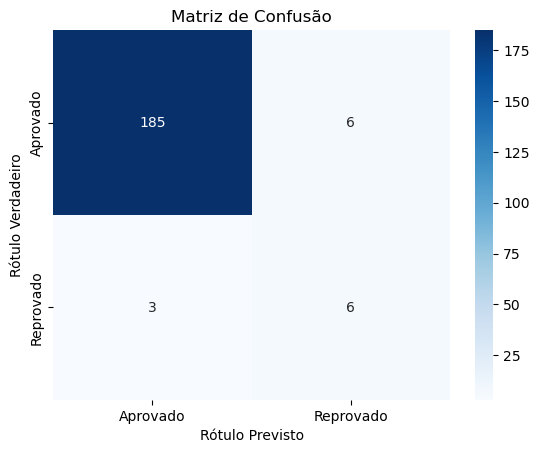

In [11]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  confusion_matrix

# Gerando a matriz de confusão
confusion_mat = confusion_matrix(y_true, y_pred)
print("Matriz de Confusão:")
print(confusion_mat)

# Plotando a matriz de confusão
labels = ['Aprovado', 'Reprovado']
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

In [1]:
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier

# Dados sintéticos para treinamento do modelo
mecanica_media = 6.5
mecanica_desvio = 0.8

eletricidade_media = 6.9
eletricidade_desvio = 1.2

optica_media = 5.0
optica_desvio = 1.4

termodinamica_media = 7.5
termodinamica_desvio = 1.5

data = []
for _ in range(500):
    mecanica = round(random.gauss(mecanica_media, mecanica_desvio), 1)
    eletricidade = round(random.gauss(eletricidade_media, eletricidade_desvio), 1)
    optica = round(random.gauss(optica_media, optica_desvio), 1)
    termodinamica = round(random.gauss(termodinamica_media, termodinamica_desvio), 1)

    # Verificando aprovação/reprovação para cada disciplina
    mecanica_status = 'Aprovado' if mecanica >= 5.0 else 'Reprovado'
    eletricidade_status = 'Aprovado' if eletricidade >= 5.0 else 'Reprovado'
    optica_status = 'Aprovado' if optica >= 5.0 else 'Reprovado'
    termodinamica_status = 'Aprovado' if termodinamica >= 5.0 else 'Reprovado'

    data.append([mecanica, eletricidade, optica, termodinamica,
                 mecanica_status, eletricidade_status, optica_status, termodinamica_status])

# Criando o dataframe com os dados sintéticos
columns = ['Mecanica', 'Eletricidade', 'Optica', 'Termodinamica',
           'Status Mecanica', 'Status Eletricidade', 'Status Optica', 'Status Termodinamica']
df = pd.DataFrame(data, columns=columns)

# Treinando o modelo
X_train = df.drop(['Status Mecanica', 'Status Eletricidade', 'Status Optica', 'Status Termodinamica'], axis=1)
y_train_mecanica = df['Status Mecanica']
y_train_eletricidade = df['Status Eletricidade']
y_train_optica = df['Status Optica']
y_train_termodinamica = df['Status Termodinamica']

model_mecanica = RandomForestClassifier()
model_mecanica.fit(X_train, y_train_mecanica)

model_eletricidade = RandomForestClassifier()
model_eletricidade.fit(X_train, y_train_eletricidade)

model_optica = RandomForestClassifier()
model_optica.fit(X_train, y_train_optica)

model_termodinamica = RandomForestClassifier()
model_termodinamica.fit(X_train, y_train_termodinamica)

# Função para retornar o conteúdo de estudo com base na nota e modelo de ML
def obter_conteudo(disciplina, nota):
    # Tratando a entrada da disciplina para reconhecer maiúsculas, minúsculas e acentos
    disciplina = re.sub(r'[^\w\s]', '', disciplina.lower())
    
    if disciplina == 'mecanica':
        if nota >= 5.0:
            return 'Parabéns! Você já atingiu a nota mínima em Mecânica.'
        else:
            return 'Você precisa estudar Mecânica para atingir a nota mínima. Aqui está um material de estudo: [Livro recomendado: Fundamentos da Mecânica de Robert C. O Connell]'
    elif disciplina == 'eletricidade':
        if nota >= 5.0:
            return 'Parabéns! Você já atingiu a nota mínima em Eletricidade.'
        else:
            return 'Você precisa estudar Eletricidade para atingir a nota mínima. Aqui está um material de estudo: ["Fundamentos de Eletricidade" de Charles K. Alexander e Matthew N. O. Sadiku]'
    elif disciplina == 'optica':
        if nota >= 5.0:
            return 'Parabéns! Você já atingiu a nota mínima em Óptica.'
        else:
            return 'Você precisa estudar Óptica para atingir a nota mínima. Aqui está um material de estudo: ["Termodinâmica para Engenharia" de Michael J. Moran, Howard N. Shapiro, Daisie D. Boettner e Margaret B. Bailey]'
    elif disciplina == 'termodinamica':
        if nota >= 5.0:
            return 'Parabéns! Você já atingiu a nota mínima em Termodinâmica.'
        else:
            return 'Você precisa estudar Termodinâmica para atingir a nota mínima. Aqui está um material de estudo: ["Fundamentos de Óptica" de Francis A. Jenkins e Harvey E. White]'
    else:
        return 'Disciplina inválida.'

# Programa interativo para o aluno inserir suas notas
print('--- Sistema de Recomendação de Estudos ---')
while True:
    disciplina = input('Digite o nome da disciplina (Mecânica, Eletricidade, Óptica, Termodinâmica) ou "sair" para encerrar: ')
    if disciplina.lower() == 'sair':
        break
    nota_str = input('Digite sua nota na disciplina: ')
    nota = float(re.sub(r'[^\d.,]', '', nota_str).replace(',', '.'))
    conteudo = obter_conteudo(disciplina, nota)
    print(conteudo)


NameError: name 'random' is not defined